#  Bouldering Analysis Notebook

 This notebook explores computer vision techniques to analyze climbing wall images. 
 The goal is to develop methods for automatically analyzing climbing wall layouts and routes.

 ## Basic Preprocessing
 
 The first step is to preprocess the images to make them easier to analyze:
 
 1. Convert to grayscale to focus on intensity values
 2. Apply noise reduction using Gaussian blur
 3. Detect edges using Canny edge detection
 4. Visualize the intermediate results at each step

 This preprocessing pipeline will help highlight key features like holds and wall structures
 while reducing noise and irrelevant details.


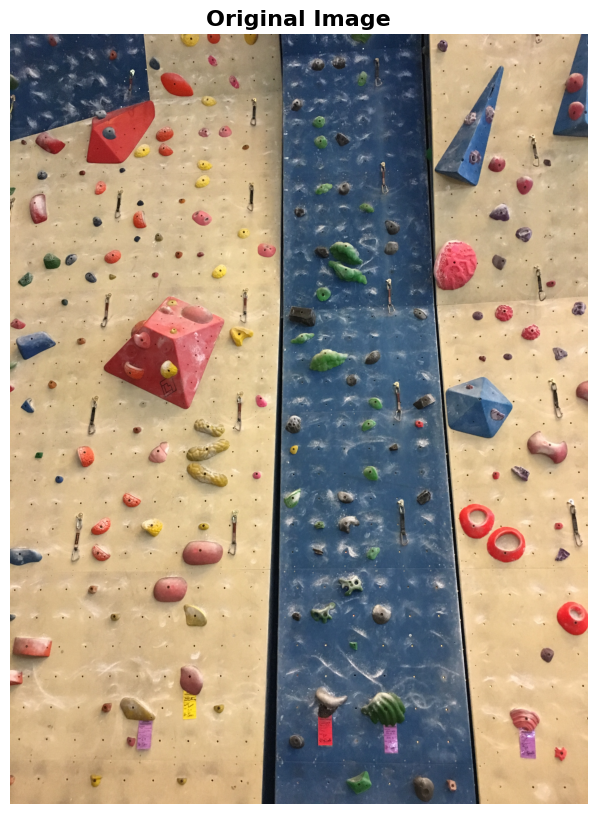

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Read the image
img_path = 'immagini test/IMG_001.JPG'
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Display the image
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
plt.title('Original Image', fontsize=16, fontweight='bold')
plt.show()

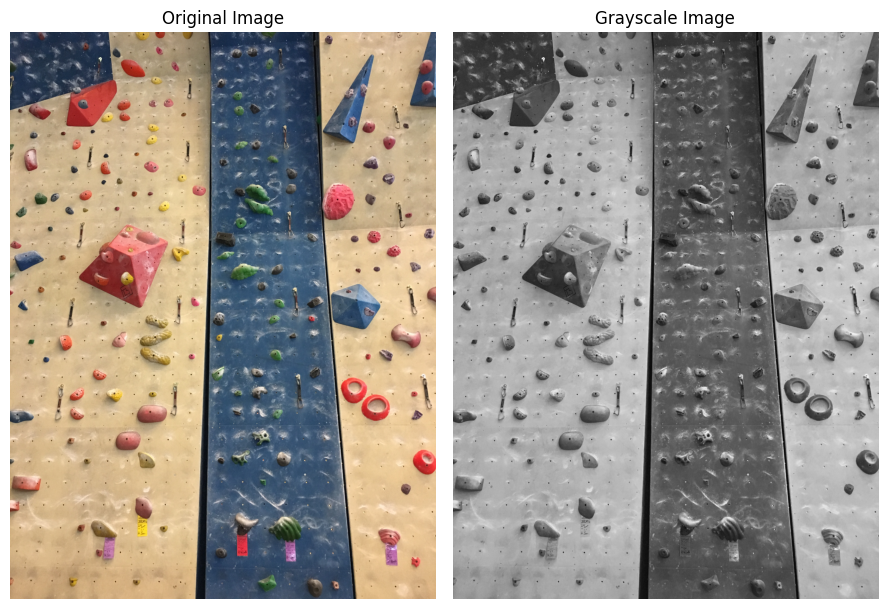

In [2]:
# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Display original and grayscale images side by side
plt.figure(figsize=(9, 6))

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Grayscale Image')
plt.imshow(gray, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

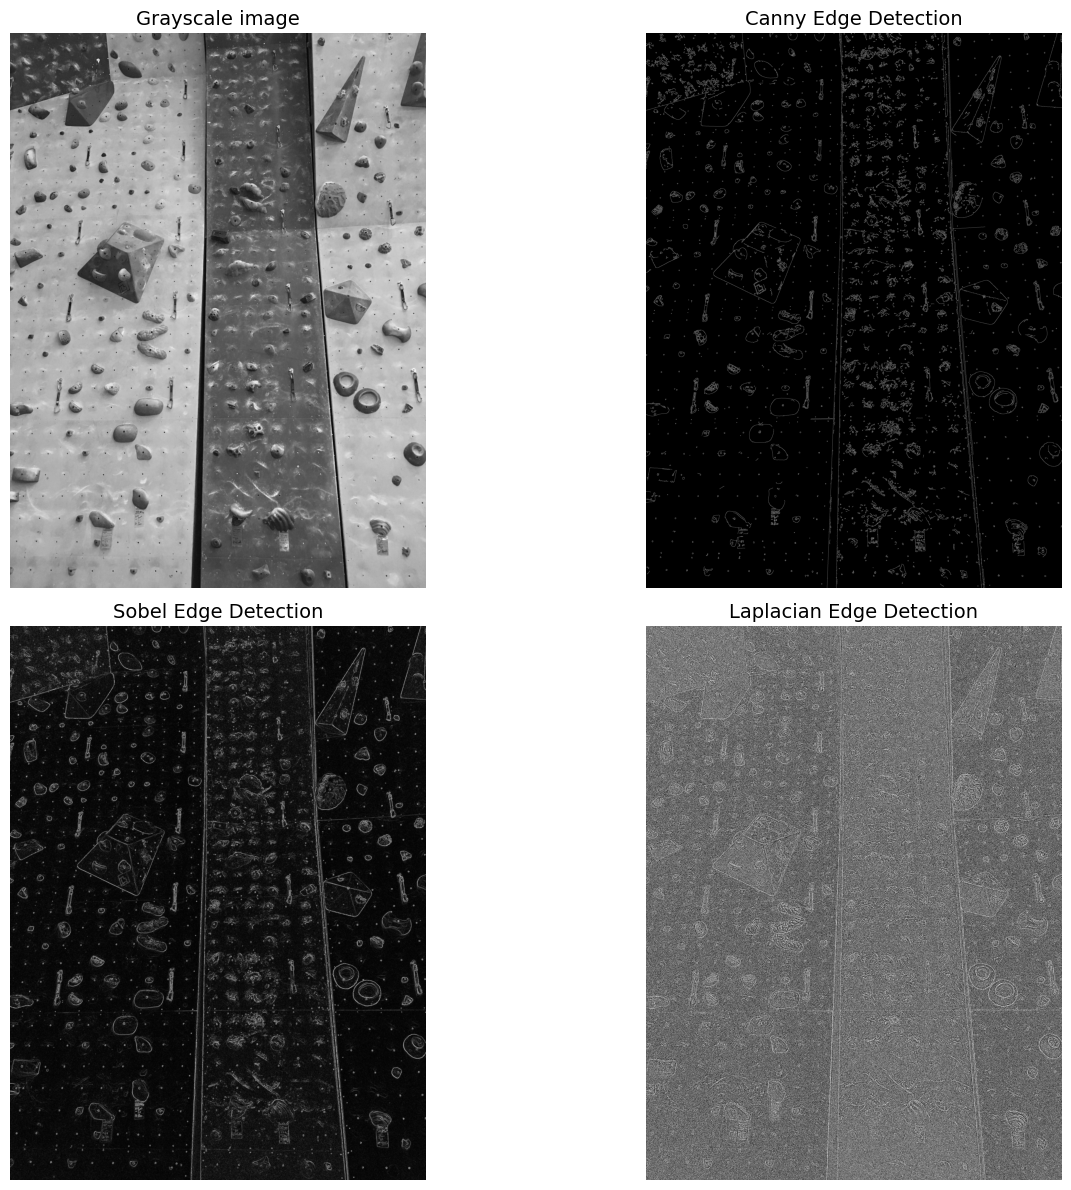

In [11]:
# Edge Detection Analysis
def detect_edges(image, method='canny', **kwargs):
    if method == 'canny':
        # Default values if not provided
        threshold1 = kwargs.get('threshold1', 100)
        threshold2 = kwargs.get('threshold2', 200)
        return cv2.Canny(image, threshold1, threshold2)
    elif method == 'sobel':
        # Compute gradients in x and y directions
        sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
        sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
        # Combine gradients
        return np.uint8(np.sqrt(sobelx**2 + sobely**2))
    elif method == 'laplacian':
        return cv2.Laplacian(image, cv2.CV_64F).astype(np.uint8)

# Apply different edge detection methods
canny_edges = detect_edges(gray, 'canny', threshold1=50, threshold2=150)
sobel_edges = detect_edges(gray, 'sobel')
laplacian_edges = detect_edges(gray, 'laplacian')

# Create figure for comparison
plt.figure(figsize=(15, 12))

# Original grayscale
plt.subplot(2, 2, 1)
plt.title('Grayscale image', fontsize=14)
plt.imshow(gray, cmap='gray')
plt.axis('off')

# Canny edges
plt.subplot(2, 2, 2)
plt.title('Canny Edge Detection', fontsize=14)
plt.imshow(canny_edges, cmap='gray')
plt.axis('off')

# Sobel edges
plt.subplot(2, 2, 3)
plt.title('Sobel Edge Detection', fontsize=14)
plt.imshow(sobel_edges, cmap='gray')
plt.axis('off')

# Laplacian edges
plt.subplot(2, 2, 4)
plt.title('Laplacian Edge Detection', fontsize=14)
plt.imshow(laplacian_edges, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

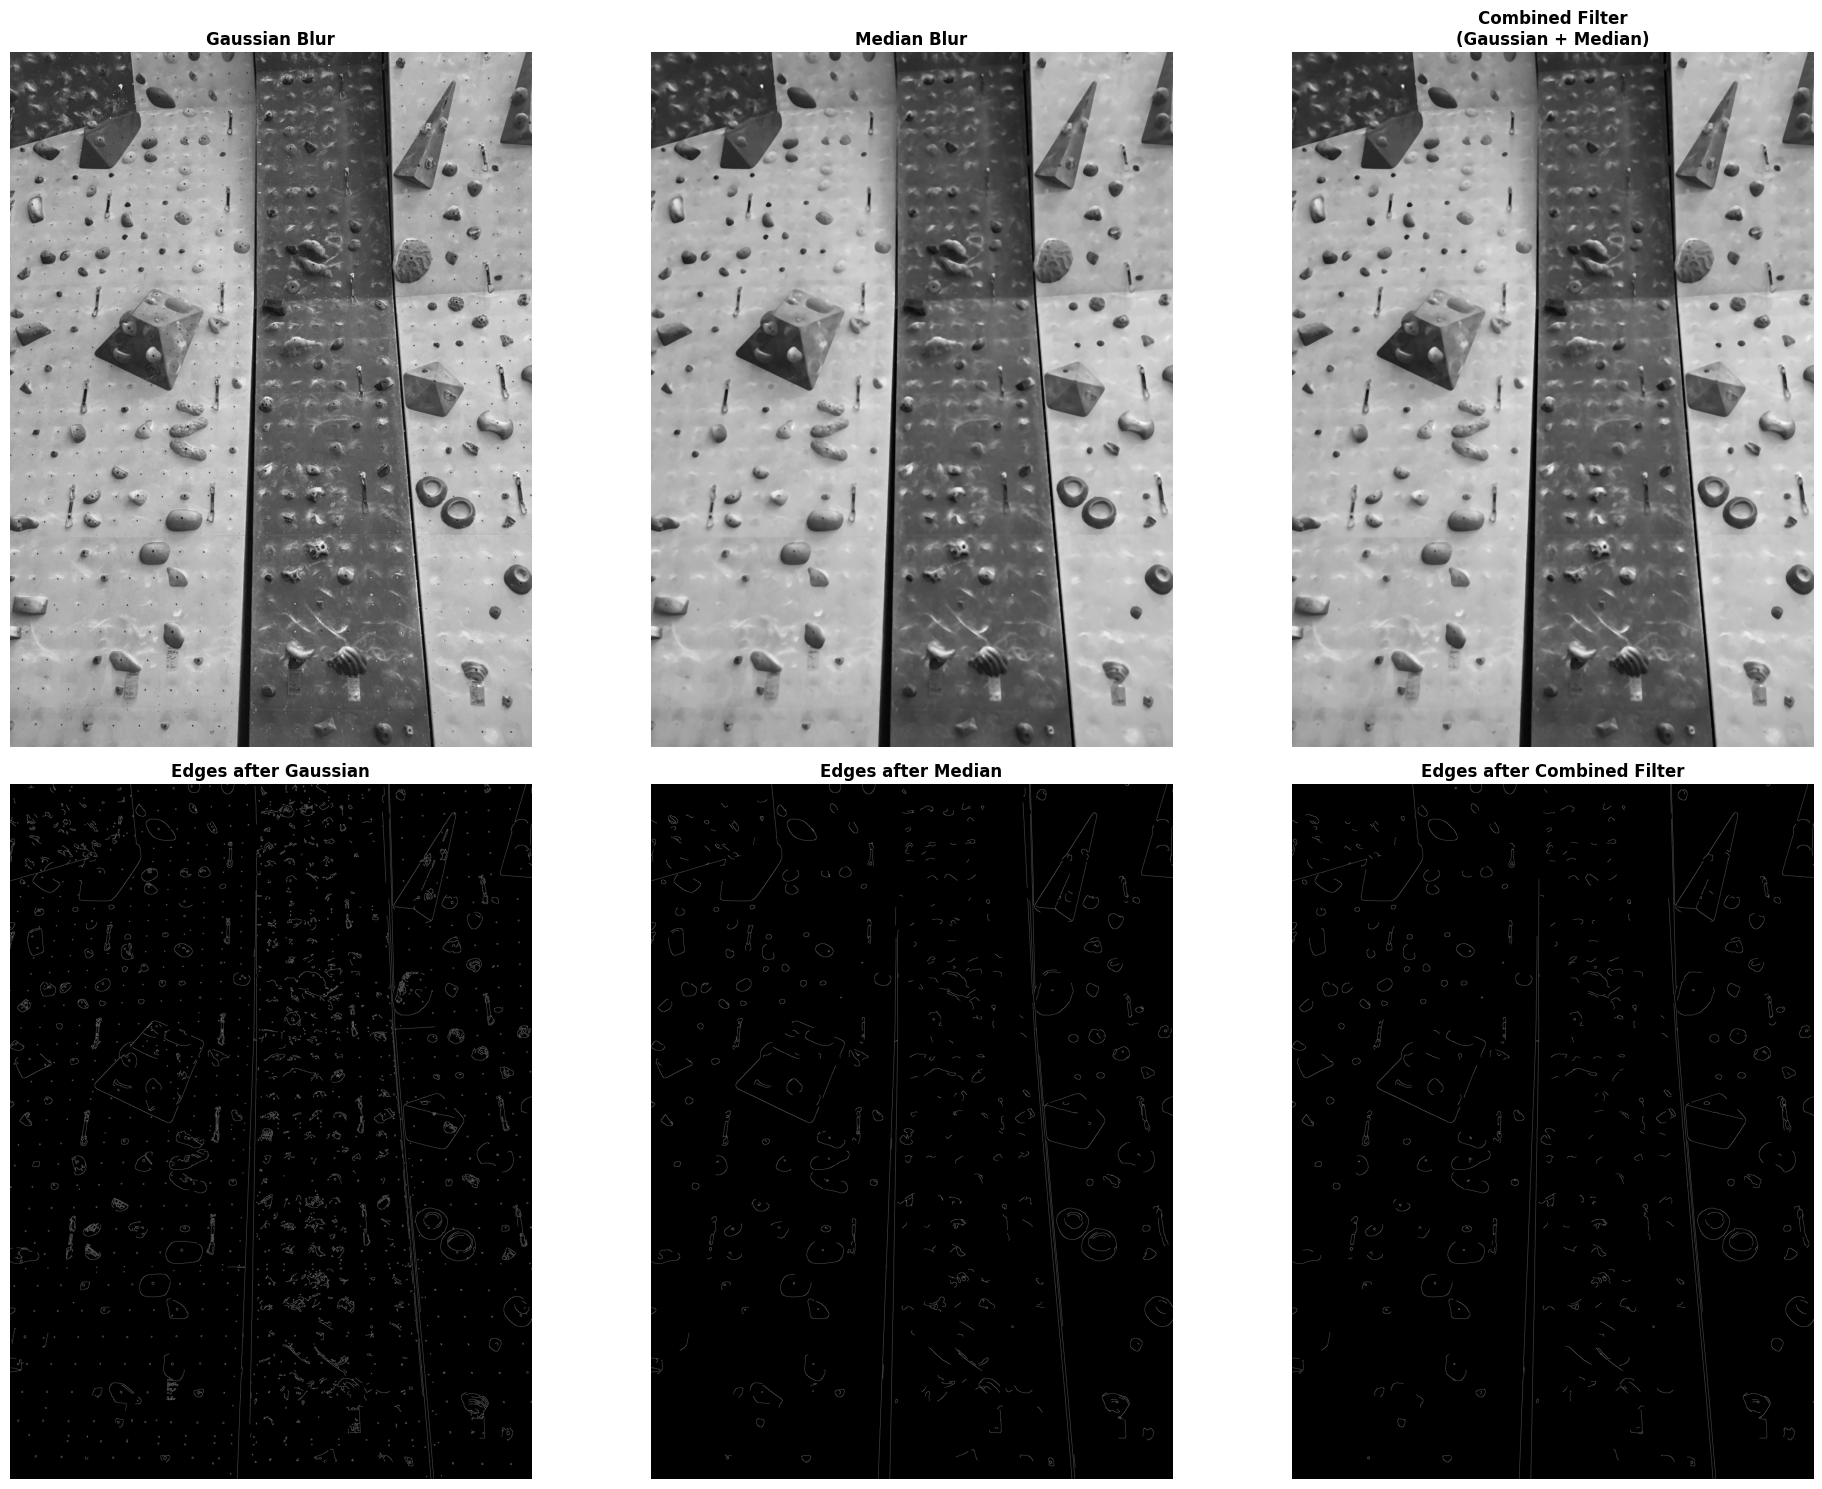

In [40]:
# Define the custom combined filter
def custom_combined_filter(image, gaussian_kernel=(5,5), median_kernel=15, gaussian_sigma=0):
    # First apply Gaussian blur
    gaussian_result = cv2.GaussianBlur(image, gaussian_kernel, gaussian_sigma)
    # Then apply Median blur
    final_result = cv2.medianBlur(gaussian_result, median_kernel)
    return final_result

# Apply filters
gaussian_blur = cv2.GaussianBlur(gray, (5,5), 0)
median_blur = cv2.medianBlur(gray, 15)
combined_blur = custom_combined_filter(gray, gaussian_kernel=(5,5), median_kernel=15, gaussian_sigma=0)

# Apply edge detection to each filtered version
canny_gaussian = detect_edges(gaussian_blur, 'canny', threshold1=50, threshold2=150)
canny_median = detect_edges(median_blur, 'canny', threshold1=50, threshold2=150)
canny_combined = detect_edges(combined_blur, 'canny', threshold1=50, threshold2=150)

# Create comparison figure
plt.figure(figsize=(20, 15))

# First row: Filtered images
plt.subplot(2, 3, 1)
plt.title('Gaussian Blur', fontsize=12, fontweight='bold')
plt.imshow(gaussian_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.title('Median Blur', fontsize=12, fontweight='bold')
plt.imshow(median_blur, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.title('Combined Filter\n(Gaussian + Median)', fontsize=12, fontweight='bold')
plt.imshow(combined_blur, cmap='gray')
plt.axis('off')

# Second row: Edge detection results
plt.subplot(2, 3, 4)
plt.title('Edges after Gaussian', fontsize=12, fontweight='bold')
plt.imshow(canny_gaussian, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.title('Edges after Median', fontsize=12, fontweight='bold')
plt.imshow(canny_median, cmap='gray')
plt.axis('off')

plt.subplot(2, 3, 6)
plt.title('Edges after Combined Filter', fontsize=12, fontweight='bold')
plt.imshow(canny_combined, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

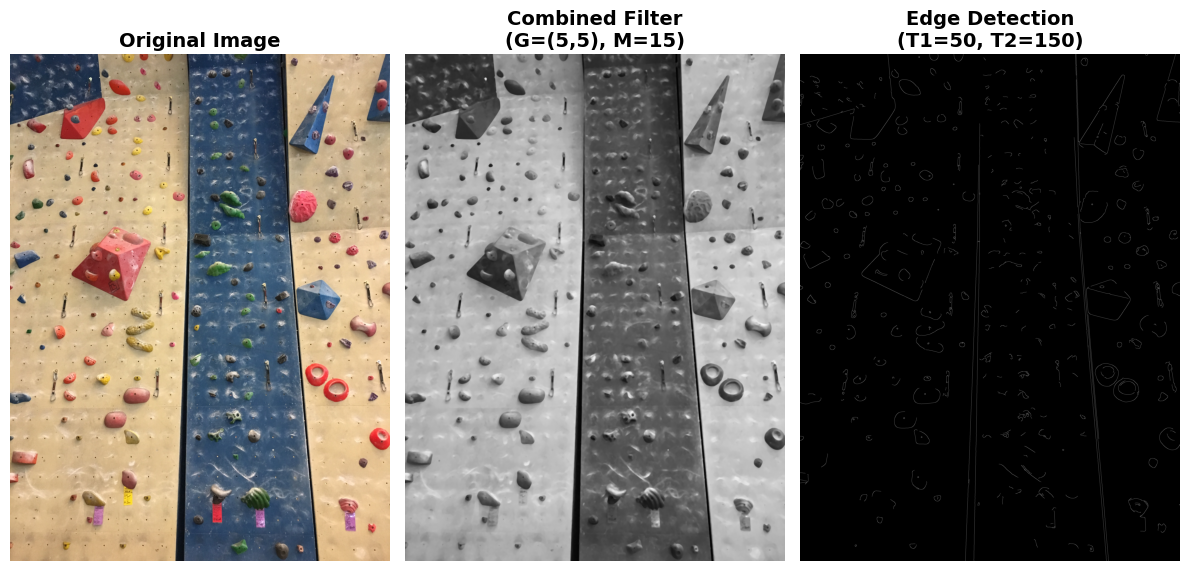

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Apply combined filter
filtered = custom_combined_filter(
    gray, 
    gaussian_kernel=(5,5),
    median_kernel=15
)

# Apply edge detection
edges = cv2.Canny(filtered, 50, 150)

# Create subplots
plt.subplot(131)
plt.imshow(img, cmap='gray')
plt.title('Original Image', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(132)
plt.imshow(filtered, cmap='gray')
plt.title(f'Combined Filter\n(G=(5,5), M=15)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(133)
plt.imshow(edges, cmap='gray')
plt.title(f'Edge Detection\n(T1=50, T2=150)', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()


### Image Preprocessing summary

The preprocessing stage focused on noise reduction while preserving critical edge information for hold detection. After comparing different filtering approaches:

- **Median Filter (13x13)**: Selected as optimal solution
  - Effectively removed chalk marks and random noise specks
  - Preserved sharp edges of climbing holds
  - Large enough kernel to handle substantial noise patches

- **Alternative Approaches**:
  - Smaller median kernels: Insufficient for larger noise areas
  - Gaussian blur: Caused excessive edge softening

The 13x13 median filter produced the cleanest image for subsequent edge detection, striking the right balance between noise removal and hold edge preservation.